<a href="https://colab.research.google.com/github/convenience-tinashe-chibatamoto/Iris-Flower-Classification/blob/main/Iris_Flower_Classification_using_5_different_models_KNN%2C_XGBoost%2C_LightGBM%2C_CatBoost%2C_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

In [17]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [18]:
# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [19]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# KNN Classifier
# KNN Classifier
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_grid = GridSearchCV(knn, param_grid, cv=5)
knn_grid.fit(X_train, y_train)
knn_score = knn_grid.score(X_test, y_test)

In [21]:
# XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
xgb_score = xgb.score(X_test, y_test)

In [22]:
# LightGBM
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
lgbm_score = lgbm.score(X_test, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.073920
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

In [23]:
# CatBoost
cat = CatBoostClassifier(random_state=42)
cat.fit(X_train, y_train)
cat_score = cat.score(X_test, y_test)

Learning rate set to 0.071017
0:	learn: 1.0249453	total: 758us	remaining: 757ms
1:	learn: 0.9509641	total: 1.57ms	remaining: 785ms
2:	learn: 0.8864673	total: 2.35ms	remaining: 783ms
3:	learn: 0.8275033	total: 3.07ms	remaining: 765ms
4:	learn: 0.7739671	total: 3.8ms	remaining: 755ms
5:	learn: 0.7348459	total: 4.51ms	remaining: 747ms
6:	learn: 0.6921423	total: 5.21ms	remaining: 739ms
7:	learn: 0.6484904	total: 5.9ms	remaining: 731ms
8:	learn: 0.6113394	total: 6.68ms	remaining: 735ms
9:	learn: 0.5824202	total: 7.38ms	remaining: 731ms
10:	learn: 0.5502154	total: 8.15ms	remaining: 733ms
11:	learn: 0.5241171	total: 8.9ms	remaining: 733ms
12:	learn: 0.4990672	total: 9.62ms	remaining: 730ms
13:	learn: 0.4781946	total: 10.3ms	remaining: 726ms
14:	learn: 0.4549464	total: 11ms	remaining: 725ms
15:	learn: 0.4335721	total: 11.8ms	remaining: 723ms
16:	learn: 0.4105152	total: 12.5ms	remaining: 723ms
17:	learn: 0.3951128	total: 13.2ms	remaining: 720ms
18:	learn: 0.3784171	total: 13.9ms	remaining: 719m

In [24]:
# Convolutional Neural Network (CNN)
# Reshaping the data to fit the CNN input
X_train_cnn = X_train.reshape(X_train.shape[0], 1, 4, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 1, 4, 1)


# Defining the CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (1, 1), activation='relu', input_shape=(1, 4, 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(3, activation='softmax'))
cnn_model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0)
cnn_model.fit(X_train_cnn, y_train, epochs=100, batch_size=32, validation_data=(X_test_cnn, y_test), callbacks=[early_stopping], verbose=0)
cnn_score = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)[1]

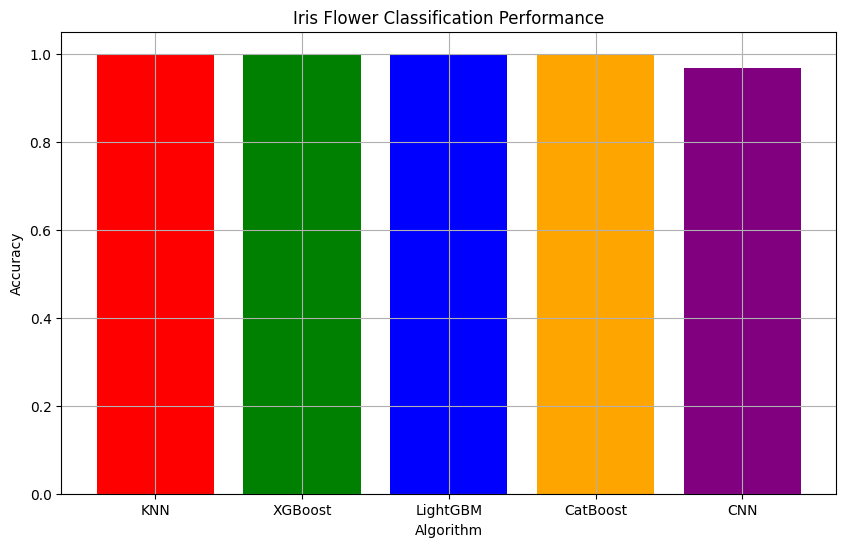

In [25]:
# Visual Comparison of Model Performance
algorithms = ['KNN', 'XGBoost', 'LightGBM', 'CatBoost', 'CNN']
scores = [knn_score, xgb_score, lgbm_score, cat_score, cnn_score]
colors = ['red', 'green', 'blue', 'orange', 'purple']

plt.figure(figsize=(10, 6))
plt.bar(algorithms, scores, color=colors)
plt.title('Iris Flower Classification Performance')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [26]:
print(cnn_score)

0.9666666388511658


***

*   Only when we train the CNN with early stopping does the overfitting issue get resolved.
*  The fact that the CNN model was able to achieve a rather reasonable ~96% accuracy, while the other models overfitted, demonstrates the importance of using the right algorithm and techniques for the specific problem and dataset at hand. It's a great example of how different machine learning approaches can perform differently on the same task.

***